In [2]:
# Импорт matplotlib
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [55]:
# Импорт обучающей выборки
ser_g = pd.read_csv('bus.csv')


ParserError: Error tokenizing data. C error: Expected 5 fields in line 2025, saw 7


In [12]:
#  Знакомимся с данными
ser_g.head()

,month,sales
0,1980-01-01,15136
1,1980-02-01,16733
2,1980-03-01,20016
3,1980-04-01,17708
4,1980-05-01,18019


In [13]:
#  Знакомимся с данными
ser_g.shape

(176, 2)

In [14]:
#  Знакомимся с данными
ser_g.tail()

,month,sales
171,1994-04-01,26323
172,1994-05-01,23779
173,1994-06-01,27549
174,1994-07-01,29660
175,1994-08-01,23356


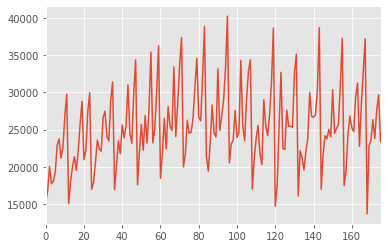

In [15]:
#  График. Что можно сказать?  
ser_g.iloc[:,1].plot()

#его можно прологарифмировать ряд 


Вывод: будем строить модель линейной регрессии для прогнозирования логарифма от объёма перевозок. 


In [18]:
#  Надо прогнозировать логарифм
ser_g['log_y'] = np.log10(ser_g['sales'])

Text(0, 0.5, 'log10 от тысяч человек')

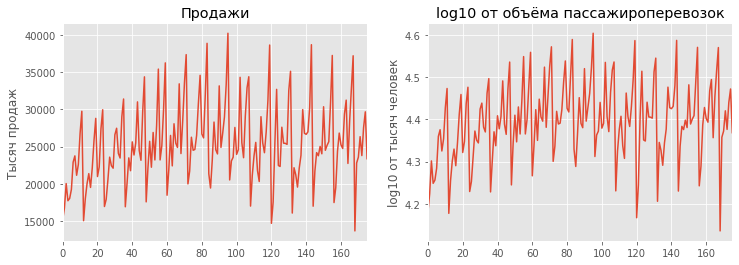

In [19]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ser_g['sales'].plot(ax=ax1)
ax1.set_title(u'Продажи')
ax1.set_ylabel(u'Тысяч продаж')

ax2 = fig.add_subplot(122)
pd.Series(ser_g['log_y']).plot(ax=ax2)
ax2.set_title(u'log10 от объёма пассажироперевозок')
ax2.set_ylabel(u'log10 от тысяч человек')


In [20]:

#  Все хорошо?
ser_g.head()

,month,sales,log_y
0,1980-01-01,15136,4.180011
1,1980-02-01,16733,4.223574
2,1980-03-01,20016,4.301377
3,1980-04-01,17708,4.248170
4,1980-05-01,18019,4.255731


In [21]:
# Преобразуем данные
# надо построить авторегрессию из временного ряда
# X: 1 ... 12 Y:13
# X1: 2,..., 13 Y:14

ser_g_2 = pd.DataFrame()

for i in range(12,0,-1):
    ser_g_2['t-'+str(i)] = ser_g.iloc[:,2].shift(i)

ser_g_2['t'] = ser_g.iloc[:,2].values

print(ser_g_2.head(13))




        t-12      t-11      t-10       t-9       t-8       t-7       t-6  \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6        NaN       NaN       NaN       NaN       NaN       NaN  4.180011   
7        NaN       NaN       NaN       NaN       NaN  4.180011  4.223574   
8        NaN       NaN       NaN       NaN  4.180011  4.223574  4.301377   
9        NaN       NaN       NaN  4.180011  4.223574  4.301377  4.248170   
10       NaN       NaN  4.180011  4.223574  4.301377  4.248170  4.255731   
11       NaN  4.180011  4.223574  4.301377  4.248170  4.255731  4.283912   
12  4.180011

In [23]:
#  Отрезаем первые 12 строк
ser_g_4 = ser_g_2[12:]

ser_g_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,4.180011,4.223574,4.301377,4.248170,4.255731,4.283912,4.359703,4.375462,4.324961,4.353935,4.427908,4.473341,4.176901
13,4.223574,4.301377,4.248170,4.255731,4.283912,4.359703,4.375462,4.324961,4.353935,4.427908,4.473341,4.176901,4.254717
14,4.301377,4.248170,4.255731,4.283912,4.359703,4.375462,4.324961,4.353935,4.427908,4.473341,4.176901,4.254717,4.301204
15,4.248170,4.255731,4.283912,4.359703,4.375462,4.324961,4.353935,4.427908,4.473341,4.176901,4.254717,4.301204,4.329479
16,4.255731,4.283912,4.359703,4.375462,4.324961,4.353935,4.427908,4.473341,4.176901,4.254717,4.301204,4.329479,4.289990


In [24]:
#  предикторы и отклик разделяем
# Отклик  вектор y
y = ser_g_4['t']
# Предикторы - таблица X
X = ser_g_4.drop('t', axis=1)

In [25]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:120]
y_train = y[:120]
X_test  = X[120:]
y_test  = y[120:]

In [26]:
#  Все хорошо?
print(ser_g_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(164, 13)
(120, 12)
(120,)
(44, 12)
(44,)


In [27]:
#  Все хорошо?
print(X_train.head(5))

        t-12      t-11      t-10       t-9       t-8       t-7       t-6  \
12  4.180011  4.223574  4.301377  4.248170  4.255731  4.283912  4.359703   
13  4.223574  4.301377  4.248170  4.255731  4.283912  4.359703  4.375462   
14  4.301377  4.248170  4.255731  4.283912  4.359703  4.375462  4.324961   
15  4.248170  4.255731  4.283912  4.359703  4.375462  4.324961  4.353935   
16  4.255731  4.283912  4.359703  4.375462  4.324961  4.353935  4.427908   

         t-5       t-4       t-3       t-2       t-1  
12  4.375462  4.324961  4.353935  4.427908  4.473341  
13  4.324961  4.353935  4.427908  4.473341  4.176901  
14  4.353935  4.427908  4.473341  4.176901  4.254717  
15  4.427908  4.473341  4.176901  4.254717  4.301204  
16  4.473341  4.176901  4.254717  4.301204  4.329479  


In [28]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [29]:
from keras.models import Sequential
from keras.layers import Dense


In [30]:
#  Обучение нейронной сети 

# Creating a model
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])


# Training a model
model.fit(X_train, y_train, epochs=300, batch_size=None)



Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 80.9773 - mean_absolute_percentage_error: 204.4418
Epoch 2/300
4/4 [==============================] - 0s 1ms/step - loss: 75.1355 - mean_absolute_percentage_error: 196.9224
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 69.5309 - mean_absolute_percentage_error: 189.4288
Epoch 4/300
4/4 [==============================] - 0s 997us/step - loss: 64.1775 - mean_absolute_percentage_error: 181.9842
Epoch 5/300
4/4 [==============================] - 0s 1ms/step - loss: 59.0858 - mean_absolute_percentage_error: 174.6156
Epoch 6/300
4/4 [==============================] - 0s 1ms/step - loss: 54.2602 - mean_absolute_percentage_error: 167.3344
Epoch 7/300
4/4 [==============================] - 0s 997us/step - loss: 49.7045 - mean_absolute_percentage_error: 160.1489
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 45.4224 - mean_absolute_percentage_error: 153.0764
Epoch 9/300
4/4 [===

In [31]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

2/2 [==============================] - 0s 1ms/step - loss: 0.0158 - mean_absolute_percentage_error: 2.4510

MAPE: 2.45%


In [32]:
# Вычисляем прогноз
predictions = model.predict(X_test)
# round predictions
# rounded = [round(x[0]) for x in predictions]
# print(rounded)

In [33]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [34]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 12)
(120,)
(44, 12)
(44,)


In [35]:
#   было 144 наблюдений

#   отбросили 12 стало 132
#   train 120
#   test  12



ValueError: x and y must have same first dimension, but have shapes (12,) and (44,)

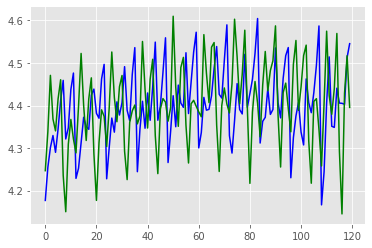

In [36]:
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)

x2 = np.arange(0, 120, 1)

x3 = np.arange(120, 132, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train, color='green')

plt.plot(x3, y_test, color='blue')

plt.plot(x3, predictions, color='red')



Есть прогноз для логарифма, нет прогноза для исходного ряда.
Нет окончательного графика.
Нет спрогнозированных значений
Доделать

Создадаим индикаторы месяцев и добавим в датасет

In [37]:
#  Переменная время
ser_g['month_num'] = range(1, len(ser_g) + 1)

In [38]:
ser_g.head()

,month,sales,log_y,month_num
0,1980-01-01,15136,4.180011,1
1,1980-02-01,16733,4.223574,2
2,1980-03-01,20016,4.301377,3
3,1980-04-01,17708,4.248170,4
4,1980-05-01,18019,4.255731,5


In [44]:
ser_g_2 = ser_g.drop(columns=["month", "sales"])

In [45]:
ser_g_2.head()

,log_y,month_num
0,4.180011,1
1,4.223574,2
2,4.301377,3
3,4.248170,4
4,4.255731,5


In [48]:
ser_g_2["m01"] = [1,0,0,0,0,0,0,0,0,0,0,0]*12
ser_g_2["m02"] = [0,1,0,0,0,0,0,0,0,0,0,0]*12
ser_g_2["m03"] = [0,0,1,0,0,0,0,0,0,0,0,0]*12
ser_g_2["m04"] = [0,0,0,1,0,0,0,0,0,0,0,0]*12
ser_g_2["m05"] = [0,0,0,0,1,0,0,0,0,0,0,0]*12
ser_g_2["m06"] = [0,0,0,0,0,1,0,0,0,0,0,0]*12
ser_g_2["m07"] = [0,0,0,0,0,0,1,0,0,0,0,0]*12
ser_g_2["m08"] = [0,0,0,0,0,0,0,1,0,0,0,0]*12
ser_g_2["m09"] = [0,0,0,0,0,0,0,0,1,0,0,0]*12
ser_g_2["m10"] = [0,0,0,0,0,0,0,0,0,1,0,0]*12
ser_g_2["m11"] = [0,0,0,0,0,0,0,0,0,0,1,0]*12
ser_g_2["m12"] = [0,0,0,0,0,0,0,0,0,0,0,1]*12

ValueError: Length of values does not match length of index

In [49]:
ser_g_2.head(14)

,log_y,month_num
0,4.180011,1
1,4.223574,2
2,4.301377,3
3,4.248170,4
4,4.255731,5
5,4.283912,6
6,4.359703,7
7,4.375462,8
8,4.324961,9
9,4.353935,10


In [30]:

#  предикторы и отклик разделяем

#  Создаем матрицу (столбец) откликов.
y = ser_g_2['log_y']

#  Создаем матрицу предикторов.
X = ser_g_2.drop(columns=["log_y"])

In [31]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:120]
y_train = y[:120]
X_test  = X[120:]
y_test  = y[120:]

In [32]:
print(ser_g_2.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(144, 14)
(120, 13)
(120,)
(24, 13)
(24,)


In [33]:
print(X_train.head(5))

   month_num  m01  m02  m03  m04  m05  m06  m07  m08  m09  m10  m11  m12
0          1    1    0    0    0    0    0    0    0    0    0    0    0
1          2    0    1    0    0    0    0    0    0    0    0    0    0
2          3    0    0    1    0    0    0    0    0    0    0    0    0
3          4    0    0    0    1    0    0    0    0    0    0    0    0
4          5    0    0    0    0    1    0    0    0    0    0    0    0


In [34]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [35]:
#  Обучение нейронной сети 

#  init_2 = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=12346)
#  init_3 = initializers.Constant(value = 1e-3)


# Creating a model
#  model = Sequential()
#  model.add(Dense(8, input_dim=12, activation='relu', kernel_initializer=init_2, bias_initializer=init_3))
#  model.add(Dense(1, activation='linear', kernel_initializer=init_2, bias_initializer=init_3))

model = Sequential()
model.add(Dense(8, input_dim=13, activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))

model.add(Dense(1, activation='linear'))

# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])


# Training a model
# model.fit(X_train, y_train, epochs=300, batch_size=7)
model.fit(X_train, y_train, epochs=300, batch_size=1)

Epoch 1/300
120/120 [==============================] - 0s 1ms/step - loss: 3.4741 - mean_absolute_percentage_error: 77.1062
Epoch 2/300
120/120 [==============================] - 0s 1ms/step - loss: 0.7164 - mean_absolute_percentage_error: 33.7276
Epoch 3/300
120/120 [==============================] - 0s 1ms/step - loss: 0.1042 - mean_absolute_percentage_error: 11.3295
Epoch 4/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0276 - mean_absolute_percentage_error: 5.7027
Epoch 5/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0224 - mean_absolute_percentage_error: 5.2800: 0s - loss: 0.0190 - mean_absolute_percentage_error: 4.90
Epoch 6/300
120/120 [==============================] - 0s 831us/step - loss: 0.0214 - mean_absolute_percentage_error: 5.2316
Epoch 7/300
120/120 [==============================] - 0s 790us/step - loss: 0.0207 - mean_absolute_percentage_error: 5.0992
Epoch 8/300
120/120 [==============================] - 0s 981us/step - los

In [300]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

1/1 [==============================] - 0s 1ms/step - loss: 5.1964e-04 - mean_absolute_percentage_error: 0.6402

MAPE: 0.64%


In [50]:

# Вычисляем прогноз
predictions = model.predict(X_test)
# round predictions
# rounded = [round(x[0]) for x in predictions]
# print(rounded)

In [51]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [52]:

# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(predictions_train.shape)
print(predictions.shape)

(120, 12)
(120,)
(44, 12)
(44,)
(120, 1)
(44, 1)


In [53]:
predictions_train2 = predictions_train[:,0]
predictions2 = predictions[:,0]

ValueError: x and y must have same first dimension, but have shapes (24,) and (44,)

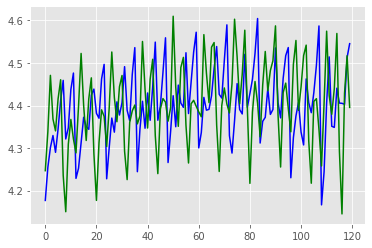

In [54]:

#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)

x2 = np.arange(0, 120, 1)

x3 = np.arange(120, 144, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train2, color='green')

plt.plot(x3, y_test, color='blue')

plt.plot(x3, predictions2, color='red')